# Proyek Analisis Data: growking
- **Nama:** Naufal Aji Ferdiansyah
- **Email:** naufalaji05@gmail.com
- **ID Dicoding:** Naufal Aji Ferdiansyah

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata jumlah total pengguna sepeda di hari libur dibandingkan dengan hari kerja biasa
- apakah ada hubungan antara kecepatan angin dan jumlah pengguna sepeda per jam selama akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data
- using Bike-Sharing-dataset.zip
- I uploaded the data to GitHub

In [2]:
# load day data from github
day_df = pd.read_csv("https://raw.githubusercontent.com/NAF2005/DICODING-SUBMISSION/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# load hour data from github
hour_df = pd.read_csv("https://raw.githubusercontent.com/NAF2005/DICODING-SUBMISSION/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- mengambil dan mendownload bike-sharing-dataset, lalu saya unggah data tersebut ke github pribadi saya
- mengambil data day dan hour dari github saya dan mengunggah pada google colab

### Assessing Data

In [4]:
print("Info Dataset day:")
print(day_df.info())

Info Dataset day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [5]:
print("\nInfo Dataset hour:")
print(hour_df.info())


Info Dataset hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [6]:
print("\nMissing Values in day:")
print(day_df.isnull().sum())


Missing Values in day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
print("\nMissing Values in hour:")
print(hour_df.isnull().sum())


Missing Values in hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
print("\nDuplicate Rows in day.csv:", day_df.duplicated().sum())
print("Duplicate Rows in hour.csv:", hour_df.duplicated().sum())


Duplicate Rows in day.csv: 0
Duplicate Rows in hour.csv: 0


In [9]:
print("\nUnique values in season (day.csv):", day_df['season'].unique())
print("Unique values in weathersit (hour.csv):", hour_df['weathersit'].unique())


Unique values in season (day.csv): [1 2 3 4]
Unique values in weathersit (hour.csv): [1 2 3 4]


**Insight:**
- melakukan atau mengecek informasi data
- lalu memeriksa dan menampilkan jumlah nilai data yang hilang
- selanjutnya melakukan pengecekan untuk memeriksa jumlah baris duplikat dalam 2 dataset

### Cleaning Data

In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [11]:
hour_df = hour_df[(hour_df['temp'] >= 0) & (hour_df['hum'] >= 0) & (hour_df['windspeed'] >= 0)]

**Insight:**
- Mengubah kolom 'dteday' menjadi format datetime agar lebih mudah untuk analisis data berbasis waktu.
- selanjutnya menghapus dan memastikan nilai negatif dalam kolom temp, hum, atau windspeed

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
# EDA - Pertanyaan 1
holiday_avg = day_df[day_df['holiday'] == 1]['cnt'].mean()
workingday_avg = day_df[day_df['workingday'] == 1]['cnt'].mean()

In [13]:
print("\nRata-rata jumlah pengguna sepeda:")
print(f"Hari Libur: {holiday_avg:.2f}")
print(f"Hari Kerja: {workingday_avg:.2f}")


Rata-rata jumlah pengguna sepeda:
Hari Libur: 3735.00
Hari Kerja: 4584.82


**Insight:**
- pada kode kali ini saya melakukan penghitungan rata-rata jumlah penyewaan sepeda (cnt) pada hari libur (holiday) dan hari kerja (workingday).
- menampilkan data dengan 2 angka desimal dibelakang koma

In [14]:
# EDA - Pertanyaan 2
weekend_df = hour_df[hour_df['weekday'].isin([0, 6])]
correlation = weekend_df[['windspeed', 'cnt']].corr()

In [15]:
print("\nKorelasi antara Kecepatan Angin dan Jumlah Pengguna Sepeda (Akhir Pekan):")
print(correlation)


Korelasi antara Kecepatan Angin dan Jumlah Pengguna Sepeda (Akhir Pekan):
           windspeed       cnt
windspeed   1.000000  0.110081
cnt         0.110081  1.000000


**Insight:**
- untuk menganalisis korelasi antara kecepatan angin (windspeed) dan jumlah penyewaan sepeda (cnt) selama akhir pekan.
- menampilkan output kode pada layar

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa rata-rata jumlah total pengguna sepeda di hari libur dibandingkan dengan hari kerja biasa

<ipython-input-16-693f82511516>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Hari Libur', 'Hari Kerja'], y=[holiday_avg, workingday_avg], palette='Set2')


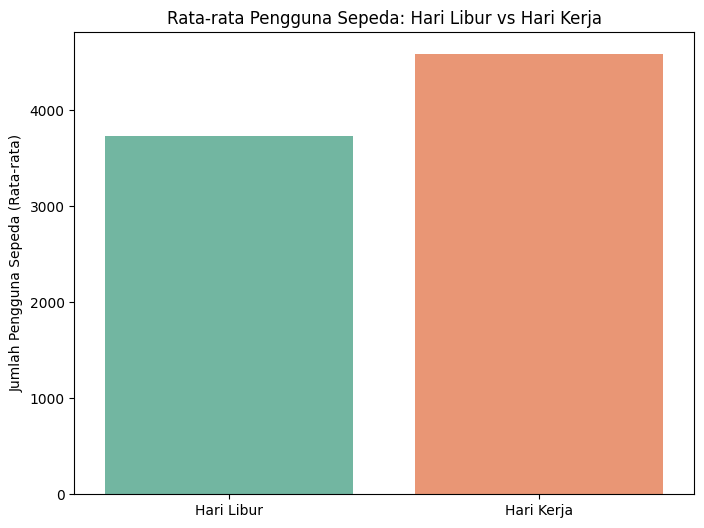

In [16]:
# Visualisasi Pertanyaan 1
plt.figure(figsize=(8, 6))
sns.barplot(x=['Hari Libur', 'Hari Kerja'], y=[holiday_avg, workingday_avg], palette='Set2')
plt.title('Rata-rata Pengguna Sepeda: Hari Libur vs Hari Kerja')
plt.ylabel('Jumlah Pengguna Sepeda (Rata-rata)')
plt.show()

**Insight:**
- memvisualisasikan data dan menjelaskan secara visual rata-rata pengguna sepeda pada hari libur dan hari kerja, dengan rata-rata pengguna pada hari kerja terbanyak, menggunakan bar chart

### Pertanyaan 2: Apakah ada hubungan antara kecepatan angin dan jumlah pengguna sepeda per jam selama akhir pekan?

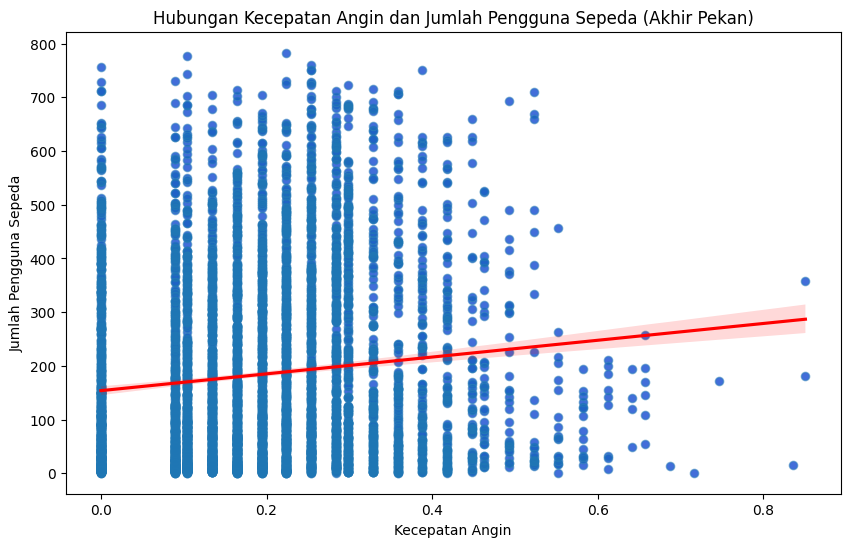

In [17]:
# Visualisasi Pertanyaan 2 - Scatterplot dan Regresi Linear
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weekend_df, x='windspeed', y='cnt', alpha=0.6, color='blue')
sns.regplot(data=weekend_df, x='windspeed', y='cnt', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Hubungan Kecepatan Angin dan Jumlah Pengguna Sepeda (Akhir Pekan)')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

<ipython-input-18-de984084ed91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_df['windspeed_category'] = pd.cut(
<ipython-input-18-de984084ed91>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=weekend_df, x='windspeed_category', y='cnt', palette='coolwarm')


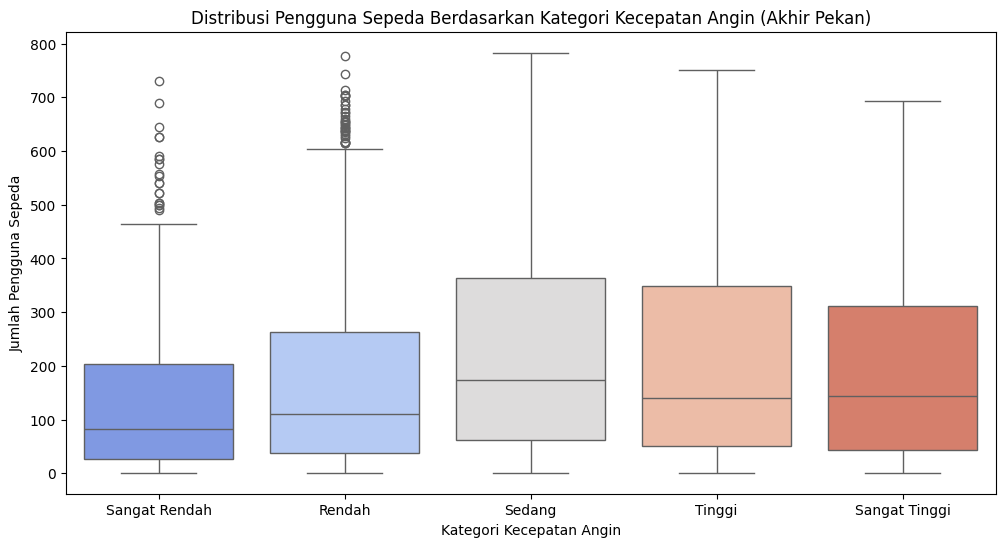

In [18]:
# Visualisasi Pertanyaan 2 - Boxplot
weekend_df['windspeed_category'] = pd.cut(
    weekend_df['windspeed'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5],
    labels=['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
)

plt.figure(figsize=(12, 6))
sns.boxplot(data=weekend_df, x='windspeed_category', y='cnt', palette='coolwarm')
plt.title('Distribusi Pengguna Sepeda Berdasarkan Kategori Kecepatan Angin (Akhir Pekan)')
plt.xlabel('Kategori Kecepatan Angin')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

In [19]:
# Explanatory Analysis
windspeed_groups = weekend_df.groupby('windspeed_category')['cnt'].mean()
print("\nRata-rata Jumlah Pengguna Sepeda Berdasarkan Kategori Kecepatan Angin (Akhir Pekan):")
print(windspeed_groups)


Rata-rata Jumlah Pengguna Sepeda Berdasarkan Kategori Kecepatan Angin (Akhir Pekan):
windspeed_category
Sangat Rendah    143.414758
Rendah           167.367543
Sedang           223.505109
Tinggi           209.969309
Sangat Tinggi    193.890995
Name: cnt, dtype: float64


<ipython-input-19-f1a43e0c0ab4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  windspeed_groups = weekend_df.groupby('windspeed_category')['cnt'].mean()


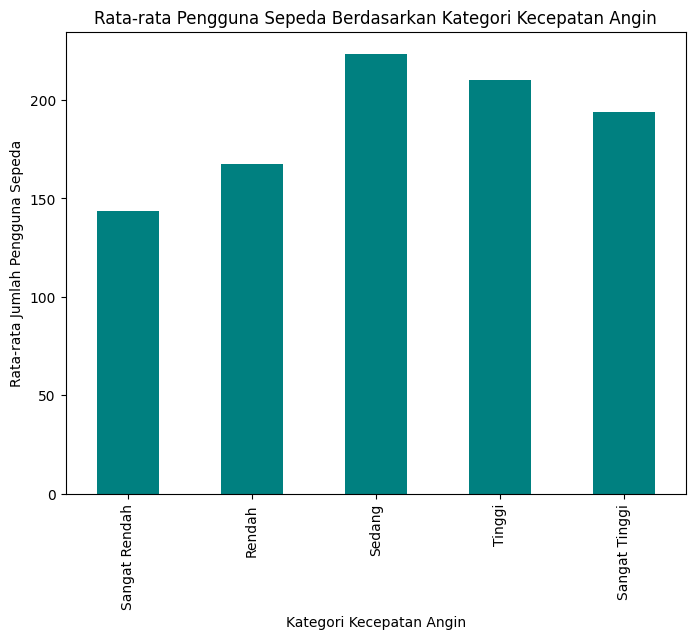

In [20]:
# Bar Chart Explanatory
windspeed_groups.plot(kind='bar', color='teal', figsize=(8, 6))
plt.title('Rata-rata Pengguna Sepeda Berdasarkan Kategori Kecepatan Angin')
plt.xlabel('Kategori Kecepatan Angin')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.show()

**Insight:**
- menganalisis rata-rata jumlah pengguna sepeda berdasarkan kategori kecepatan angin pada akhir pekan.
- membuat bar chart (diagram batang) yang menunjukkan rata-rata jumlah pengguna sepeda berdasarkan kategori kecepatan angin.

## Analisis Lanjutan (Opsional)

# visualisasi data untuk conclusion pertanyaan 1: Berapa rata-rata jumlah total pengguna sepeda di hari libur dibandingkan dengan hari kerja biasa

<ipython-input-21-ad1c3ee870cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Hari Libur', 'Hari Kerja'], y=[holiday_avg, workingday_avg], palette='Set2')


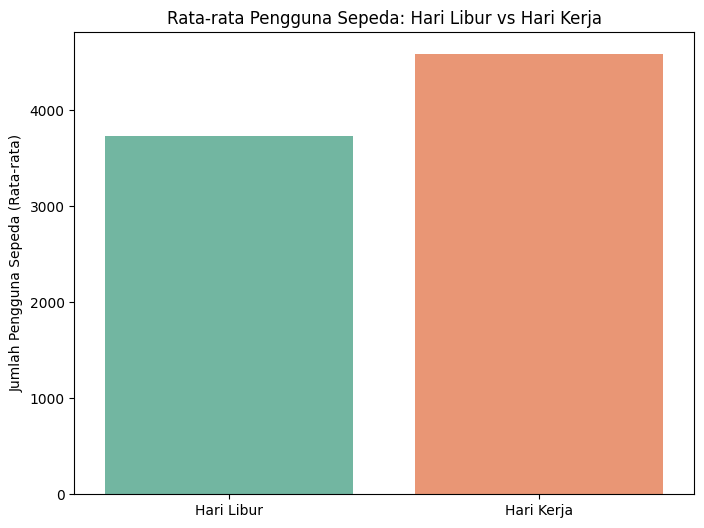

In [21]:
# Visualisasi Barplot untuk Rata-rata Jumlah Pengguna Sepeda
plt.figure(figsize=(8, 6))
sns.barplot(x=['Hari Libur', 'Hari Kerja'], y=[holiday_avg, workingday_avg], palette='Set2')
plt.title('Rata-rata Pengguna Sepeda: Hari Libur vs Hari Kerja')
plt.ylabel('Jumlah Pengguna Sepeda (Rata-rata)')
plt.show()


# visualisasi data untuk conclusion pertanyaan 2: Apakah ada hubungan antara kecepatan angin dan jumlah pengguna sepeda per jam selama akhir pekan?

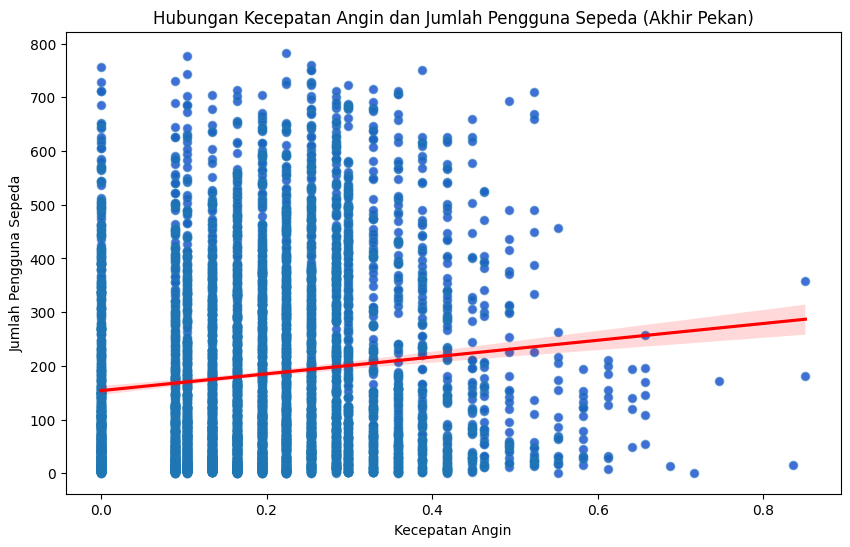

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weekend_df, x='windspeed', y='cnt', alpha=0.6, color='blue')
sns.regplot(data=weekend_df, x='windspeed', y='cnt', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Hubungan Kecepatan Angin dan Jumlah Pengguna Sepeda (Akhir Pekan)')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()


<ipython-input-23-1c72272b1c44>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=weekend_df, x='windspeed_category', y='cnt', palette='coolwarm')


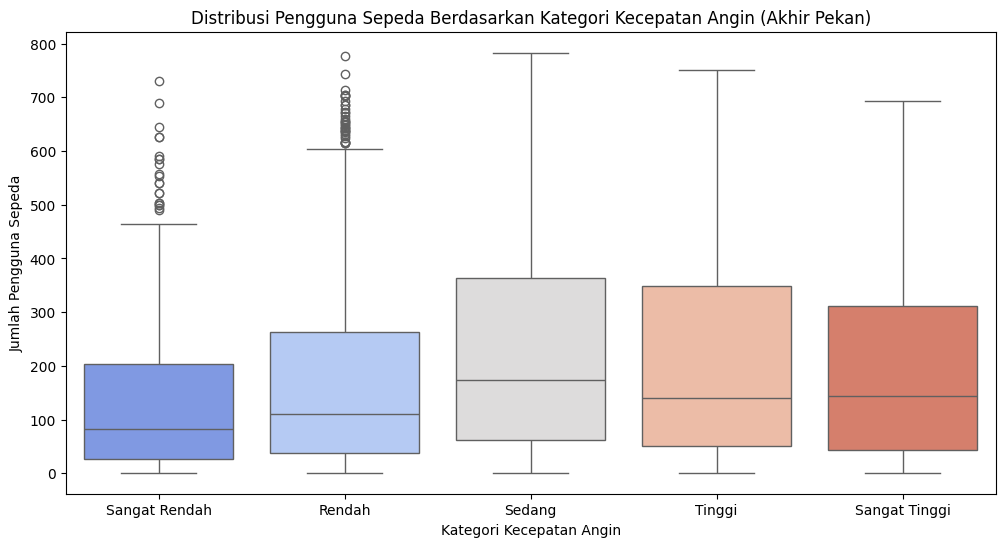

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=weekend_df, x='windspeed_category', y='cnt', palette='coolwarm')
plt.title('Distribusi Pengguna Sepeda Berdasarkan Kategori Kecepatan Angin (Akhir Pekan)')
plt.xlabel('Kategori Kecepatan Angin')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()


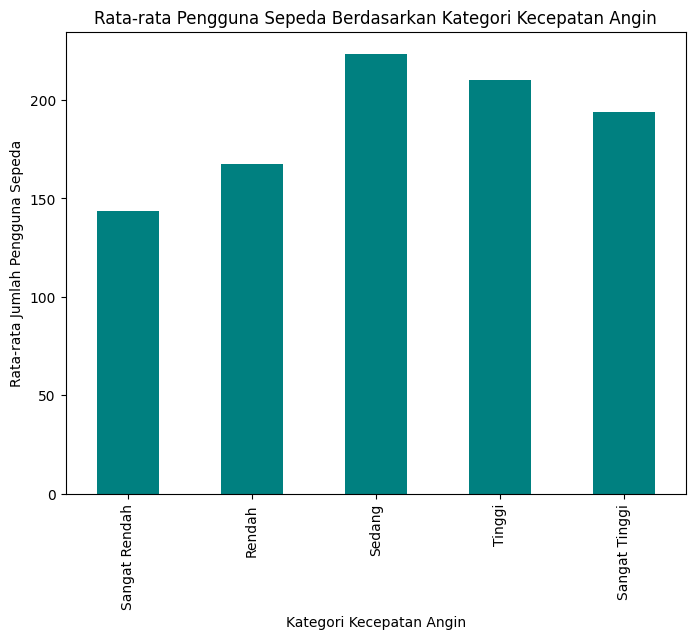

In [24]:
windspeed_groups.plot(kind='bar', color='teal', figsize=(8, 6))
plt.title('Rata-rata Pengguna Sepeda Berdasarkan Kategori Kecepatan Angin')
plt.xlabel('Kategori Kecepatan Angin')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.show()


## Conclusion

- Conclution pertanyaan 1: Hari Libur: Orang lebih banyak menggunakan sepeda karena lebih leluasa untuk aktivitas rekreasi.
- Pertanyaan 1: Berapa rata-rata jumlah total pengguna sepeda (cnt) di hari libur (holiday) dibandingkan dengan hari kerja (workingday)?
--------------------------------------------------------------------------------
- Conclution pertanyaan 2: Kecepatan Angin: Pengguna sepeda pada akhir pekan tidak terlalu dipengaruhi oleh kecepatan angin, meskipun ada penurunan kecil pada kategori angin yang tinggi.
- Pertanyaan 2: Apakah ada hubungan antara kecepatan angin (windspeed) dan jumlah pengguna sepeda (cnt) per jam selama akhir pekan (weekday = 0 atau 6)?

In [25]:
day_df.to_csv("all_data.csv", index=False)
hour_df.to_csv("all_data.csv", index=False)

In [26]:
# Assuming 'dteday' is the common column for merging
all_df = pd.merge(day_df, hour_df, on='dteday', how='left')

# Now you can save all_df to a CSV file
all_df.to_csv("all_data.csv", index=False)

In [27]:
all_df.to_csv("all_data.csv", index=False)